[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(333420, 10)
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality can

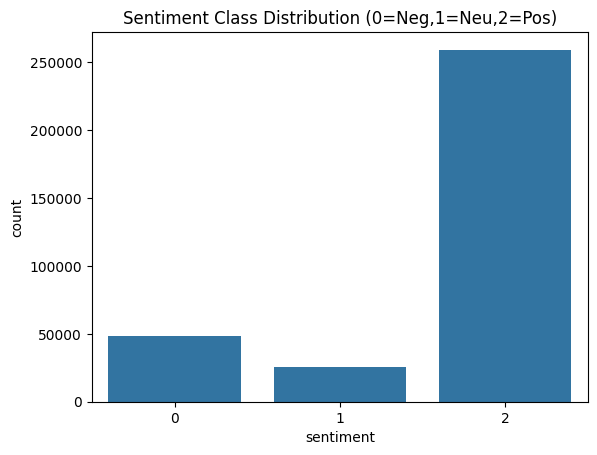

Accuracy: 0.8600113970367704
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69      9694
           1       0.51      0.17      0.26      5264
           2       0.89      0.97      0.93     51726

    accuracy                           0.86     66684
   macro avg       0.71      0.60      0.63     66684
weighted avg       0.84      0.86      0.84     66684



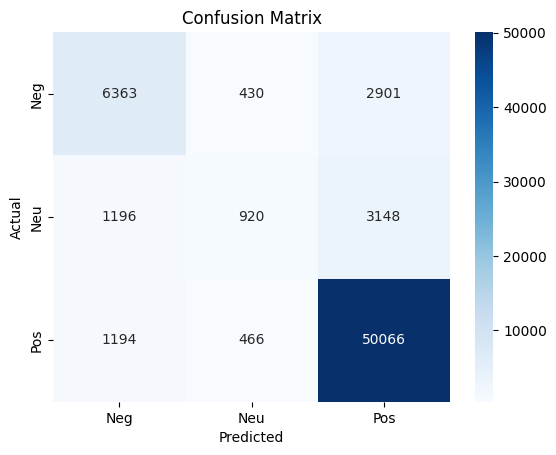

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download NLTK data (only first time)
nltk.download('stopwords')

# Load Dataset
df = pd.read_csv('/content/Reviews.csv', engine='python', on_bad_lines='skip')

# Basic Exploration
print(df.shape)
print(df.head())

# Use only necessary columns
df = df[['Score', 'Text']].dropna()

# Step 2: Data Cleaning Function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.strip()
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['Text'].apply(clean_text)

# Step 3: Create Sentiment Labels from Score
# Define: 1-2 = Negative (0), 3 = Neutral (1), 4-5 = Positive (2)
def sentiment_label(score):
    if score <= 2:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df['sentiment'] = df['Score'].apply(sentiment_label)

# Check distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Distribution (0=Neg,1=Neu,2=Pos)')
plt.show()

# Step 4: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']

# Step 5: Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neg','Neu','Pos'],
            yticklabels=['Neg','Neu','Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
